## Classifying Data Bins

In [2]:
import os, sys, glob
import matplotlib.pyplot as plt
import numpy as np
import pyart
import math
import cartopy.crs as ccrs
import cartopy
import matplotlib.colors as colors
import warnings
warnings.filterwarnings("ignore")

BASE_DIR = '/Users/jpippitt/GPM-GV/cf/'


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



## PHKI (South Shore, HI) Case

In [ ]:
# Test new output file
file = f"{BASE_DIR}/PHKI_2019_1206_122918.cf"
radar = pyart.io.read(file, file_field_names=True)
print(radar.fields.keys())

fields = ['FS','FW','MW','MI']

for fld in fields:
    nf = radar.fields[fld]['data']
    nf = grab_class(nf)
    radar.add_field_like(fld,fld,nf,replace_existing=True)
    
fields = ['RP','RC','DM','NW']

for fld in fields:
    nf = radar.fields[fld]['data']
    nf = grab_class_rr(nf)
    radar.add_field_like(fld,fld,nf,replace_existing=True)
    

### Classification Plots for (RC, RP, MW, MI, DM, NW, FS, FW)

In [ ]:
lim = [-150, 150]

class_colors = ['White','Orange', 'Purple', 'Cyan', 'Pink', 'Blue']
cmap_class = colors.ListedColormap(class_colors)

fig, ax1, ax2, display = two_panel_plot(radar, sweep=0, var1='RC', vmin1=0, vmax1=5,
               cmap1=cmap_class, var2='RP', vmin2=0, vmax2=5, 
               cmap2=cmap_class, units2=' ', return_flag=True, 
               xlim=lim, ylim=lim, units1=' ')

display.cbs[0] = adjust_colorbar_for_pyart_rr(display.cbs[0])
display.cbs[1] = adjust_colorbar_for_pyart_rr(display.cbs[1])

In [ ]:
fig, ax1, ax2, display = two_panel_plot(radar, sweep=0, var1='DM', vmin1=0, vmax1=5,
               cmap1=cmap_class, var2='NW', vmin2=0, vmax2=5, 
               cmap2=cmap_class, units2=' ', return_flag=True, 
               xlim=lim, ylim=lim, units1=' ')

display.cbs[0] = adjust_colorbar_for_pyart_rr(display.cbs[0])
display.cbs[1] = adjust_colorbar_for_pyart_rr(display.cbs[1])

In [ ]:
class_colors = ['White','Orange', 'Purple', 'Cyan', 'Pink']
cmap_class = colors.ListedColormap(class_colors)

fig, ax1, ax2, display = two_panel_plot(radar, sweep=0, var1='MW', vmin1=0, vmax1=4,
               cmap1=cmap_class, var2='MI', vmin2=0, vmax2=4, 
               cmap2=cmap_class, units2=' ', return_flag=True, 
               xlim=lim, ylim=lim, units1=' ')

display.cbs[0] = adjust_colorbar_for_pyart(display.cbs[0])
display.cbs[1] = adjust_colorbar_for_pyart(display.cbs[1])

In [ ]:
fig, ax1, ax2, display = two_panel_plot(radar, sweep=0, var1='FS', vmin1=0, vmax1=4,
               cmap1=cmap_class, var2='FW', vmin2=0, vmax2=4, 
               cmap2=cmap_class, units2=' ', return_flag=True, 
               xlim=lim, ylim=lim, units1=' ')

display.cbs[0] = adjust_colorbar_for_pyart(display.cbs[0])
display.cbs[1] = adjust_colorbar_for_pyart(display.cbs[1])

## KMQT (Marquette, MI) Case

In [3]:
# Test new output file
file = f"{BASE_DIR}/KMQT_2022_1130_015759.cf"
radar = pyart.io.read(file, file_field_names=True)
print(radar.fields.keys())

fields =['FS','FW','MW','MI']

for fld in fields:
    nf = radar.fields[fld]['data']
    nf = grab_class(nf)
    radar.add_field_like(fld,fld,nf,replace_existing=True)
    
fields = ['RP','RC','DM','NW']

for fld in fields:
    nf = radar.fields[fld]['data']
    nf = grab_class_rr(nf)
    radar.add_field_like(fld,fld,nf,replace_existing=True)

dict_keys(['DZ', 'DR', 'PH', 'RH', 'VR', 'SD', 'KD', 'CZ', 'ZZ', 'FS', 'FW', 'RC', 'MW', 'MI', 'DM', 'NW', 'RP', 'BEYOND', 'BLOCK'])


### Classification Plots for (RC, RP, MW, MI, DM, NW, FS, FW)

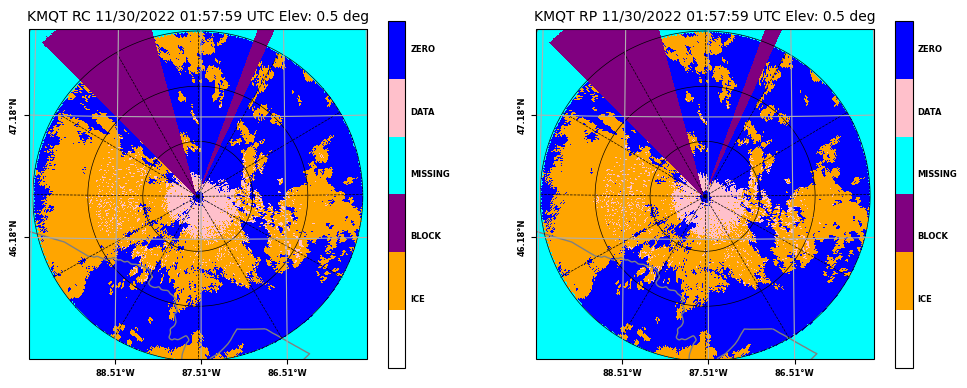

In [4]:
lim = [-150, 150]

class_colors = ['White','Orange', 'Purple', 'Cyan', 'Pink', 'Blue']
cmap_class = colors.ListedColormap(class_colors)

fig, ax1, ax2, display = two_panel_plot(radar, sweep=0, var1='RC', vmin1=0, vmax1=5,
               cmap1=cmap_class, var2='RP', vmin2=0, vmax2=5, 
               cmap2=cmap_class, units2=' ', return_flag=True, 
               xlim=lim, ylim=lim, units1=' ')

display.cbs[0] = adjust_colorbar_for_pyart_rr(display.cbs[0])
display.cbs[1] = adjust_colorbar_for_pyart_rr(display.cbs[1])

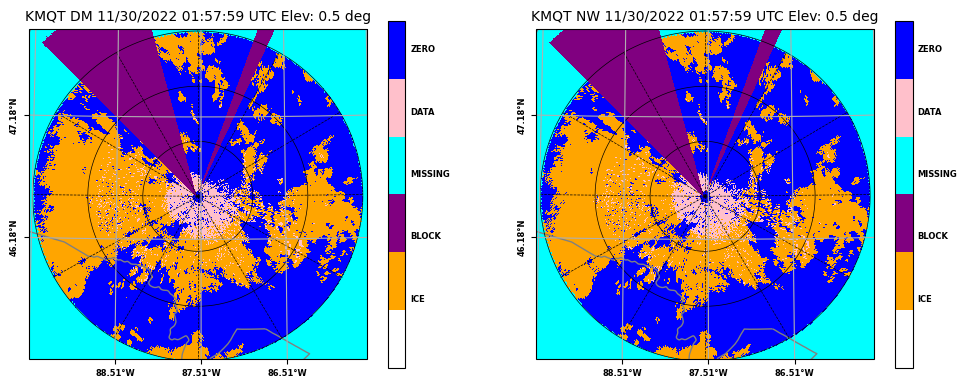

In [5]:
fig, ax1, ax2, display = two_panel_plot(radar, sweep=0, var1='DM', vmin1=0, vmax1=5,
               cmap1=cmap_class, var2='NW', vmin2=0, vmax2=5, 
               cmap2=cmap_class, units2=' ', return_flag=True, 
               xlim=lim, ylim=lim, units1=' ')

display.cbs[0] = adjust_colorbar_for_pyart_rr(display.cbs[0])
display.cbs[1] = adjust_colorbar_for_pyart_rr(display.cbs[1])

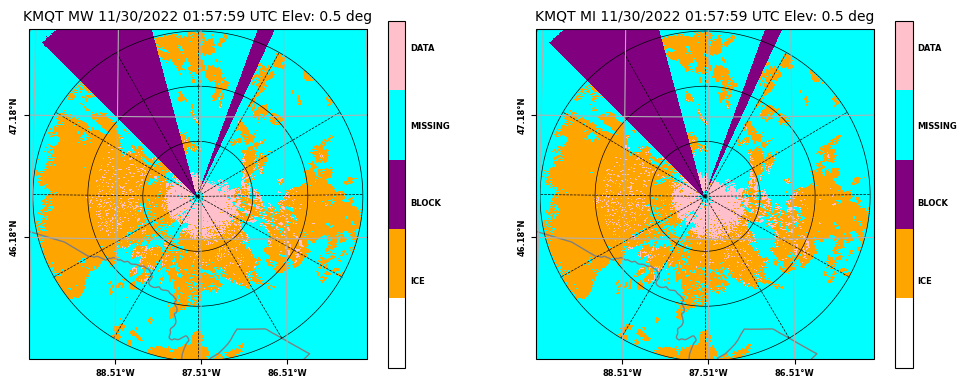

In [6]:
class_colors = ['White','Orange', 'Purple', 'Cyan', 'Pink']
cmap_class = colors.ListedColormap(class_colors)

fig, ax1, ax2, display = two_panel_plot(radar, sweep=0, var1='MW', vmin1=0, vmax1=4,
               cmap1=cmap_class, var2='MI', vmin2=0, vmax2=4, 
               cmap2=cmap_class, units2=' ', return_flag=True, 
               xlim=lim, ylim=lim, units1=' ')

display.cbs[0] = adjust_colorbar_for_pyart(display.cbs[0])
display.cbs[1] = adjust_colorbar_for_pyart(display.cbs[1])

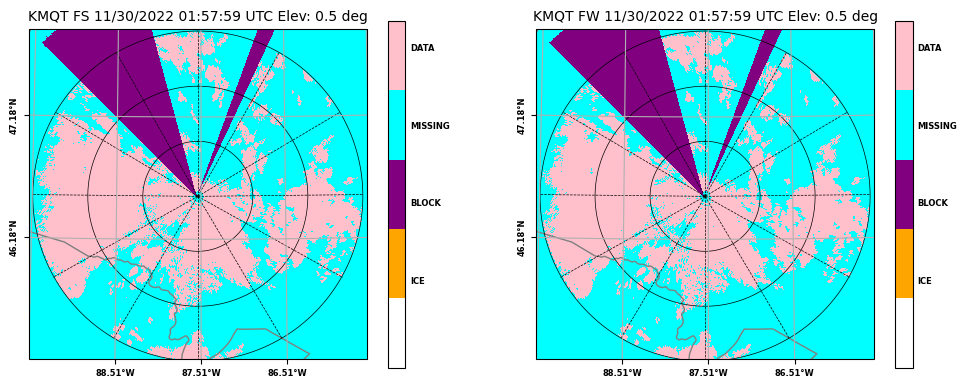

In [7]:
fig, ax1, ax2, display = two_panel_plot(radar, sweep=0, var1='FS', vmin1=0, vmax1=4,
               cmap1=cmap_class, var2='FW', vmin2=0, vmax2=4, 
               cmap2=cmap_class, units2=' ', return_flag=True, 
               xlim=lim, ylim=lim, units1=' ')

display.cbs[0] = adjust_colorbar_for_pyart(display.cbs[0])
display.cbs[1] = adjust_colorbar_for_pyart(display.cbs[1])

In [8]:
def two_panel_plot(radar, sweep=0, var1='reflectivity', title1 = ' ', vmin1=0, vmax1=65,
                   cmap1='RdYlBu_r', units1='dBZ', var2='differential_reflectivity', title2 = ' ',
                   vmin2=-5, vmax2=5, cmap2='RdYlBu_r', units2='dB', return_flag=False,
                   xlim=[-150,150], ylim=[-150,150]):
    
    site, mydate, mytime, elv, year, month, day, hh, mm, ss, string_csweep = get_radar_info(radar, sweep)
    title1 = '{} {} {} {} UTC Elev: {:2.1f} deg'.format(site,var1,mydate,mytime,elv)
    title2 = '{} {} {} {} UTC Elev: {:2.1f} deg'.format(site,var2,mydate,mytime,elv)
    
    radar_lat = radar.latitude['data'][0]
    radar_lon = radar.longitude['data'][0]
    dtor = math.pi/180.0
    maxrange_meters = xlim[1] * 1000.
    meters_to_lat = 1. / 111177.
    meters_to_lon =  1. / (111177. * math.cos(radar_lat * dtor))

    min_lat = radar_lat - maxrange_meters * meters_to_lat
    max_lat = radar_lat + maxrange_meters * meters_to_lat
    min_lon = radar_lon - maxrange_meters * meters_to_lon
    max_lon = radar_lon + maxrange_meters * meters_to_lon
    min_lon_rn=round(min_lon,2)
    max_lon_rn=round(max_lon,2)
    min_lat_rn=round(min_lat,2)
    max_lat_rn=round(max_lat,2)
    lon_grid = np.arange(min_lon_rn - 1.00 , max_lon_rn + 1.00, 1.0)
    lat_grid = np.arange(min_lat_rn - 1.00 , max_lat_rn + 1.00, 1.0)
    
    SMALL_SIZE = 6
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 14

    plt.rc('font', size=SMALL_SIZE, weight='bold') # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    projection = ccrs.LambertConformal(radar_lon, radar_lat)
    display = pyart.graph.RadarMapDisplay(radar)
    fig = plt.figure(figsize=(12,4.5))
    
    ax1 = fig.add_subplot(121,projection=projection)
    display.plot_ppi_map(var1, sweep, vmin=vmin1, vmax=vmax1,
                     resolution='10m',
                     title = title1,
                     projection=projection, ax=ax1,
                     cmap=cmap1,
                     colorbar_label=units1,
                     min_lon=min_lon, max_lon=max_lon,
                     min_lat=min_lat, max_lat=max_lat,
                     lon_lines=lon_grid,lat_lines=lat_grid,
                     add_grid_lines=True,
                     lat_0=radar_lat,
                     lon_0=radar_lon,
                     embellish = True,
                     mask_outside=True)
    
    for rng in range(50,xlim[1]+50,50):
        display.plot_range_ring(rng, line_style='k--', lw=0.5)
    add_radials(radar,display,xlim[1])
    plt.yticks(rotation=90, va = 'center')
    
    ax2 = fig.add_subplot(122,projection=projection)
    display.plot_ppi_map(var2, sweep, vmin=vmin2, vmax=vmax2,
                     resolution='10m',
                     title = title2,
                     projection=projection, ax=ax2,
                     cmap=cmap2,
                     colorbar_label=units2,
                     min_lon=min_lon, max_lon=max_lon,
                     min_lat=min_lat, max_lat=max_lat,
                     lon_lines=lon_grid,lat_lines=lat_grid,
                     add_grid_lines=True,
                     lat_0=radar_lat,
                     lon_0=radar_lon,
                     embellish = True,
                     mask_outside=True)
    
    for rng in range(50,xlim[1]+50,50):
        display.plot_range_ring(rng, line_style='k--', lw=0.5)
    add_radials(radar,display,xlim[1])
    plt.yticks(rotation=90, va = 'center')
    
    if return_flag:
        return fig, ax1, ax2, display

def add_radials(radar,display,max_range):

    radar_lat = radar.latitude['data'][0]
    radar_lon = radar.longitude['data'][0]
    dtor = math.pi/180.0
    maxrange_meters = max_range * 1000.
    meters_to_lat = 1. / 111177.
    meters_to_lon =  1. / (111177. * math.cos(radar_lat * dtor))
    
    for azi in range(0,360,30):
        azimuth = 90. - azi
        dazimuth = azimuth * dtor
        lon_maxrange = radar_lon + math.cos(dazimuth) * meters_to_lon * maxrange_meters
        lat_maxrange = radar_lat + math.sin(dazimuth) * meters_to_lat * maxrange_meters
        display.plot_line_geo([radar_lon, lon_maxrange], [radar_lat, lat_maxrange],
                              line_style='k--',lw=0.5)

def get_radar_info(radar, sweep):
    #
    # *** get radar elevation, date, time
    #
    radar_DT = pyart.util.datetime_from_radar(radar)
    elv=radar.fixed_angle['data'][sweep]
    string_csweep = str(sweep).zfill(2)
    month = str(radar_DT.month).zfill(2)
    day = str(radar_DT.day).zfill(2)
    year = str(radar_DT.year).zfill(4)
    hh = str(radar_DT.hour).zfill(2)
    mm = str(radar_DT.minute).zfill(2)
    ss = str(radar_DT.second).zfill(2)
    mydate = month + '/' + day + '/' + year
    mytime = hh + ':' + mm + ':' + ss
    if 'site_name' in radar.metadata.keys():
        site = radar.metadata['site_name'].upper()
    elif 'instrument_name' in radar.metadata.keys():
        if isinstance(radar.metadata['instrument_name'], bytes):
            site = radar.metadata['instrument_name'].decode().upper()
        else:
            site = radar.metadata['instrument_name'].upper()
    else:
        site=''

    return site, mydate, mytime, elv, year, month, day, hh, mm, ss, string_csweep 


def adjust_colorbar_for_pyart_rr(cb):
    cb.set_ticks(np.arange(1.0, 5, 0.9))
    cb.ax.set_yticklabels(['ICE', 'BLOCK', 'MISSING', 'DATA' , 'ZERO'])

    cb.ax.set_ylabel('')
    cb.ax.tick_params(length=0)

    return cb

def adjust_colorbar_for_pyart(cb):
    cb.set_ticks(np.arange(1.0, 4, 0.9))
    cb.ax.set_yticklabels(['ICE', 'BLOCK', 'MISSING', 'DATA'])

    cb.ax.set_ylabel('')
    cb.ax.tick_params(length=0)

    return cb

def grab_class_rr(fl):
    
    ice = np.equal(fl,-999)
    block = np.equal(fl,-888)
    missing = np.equal(fl,-32767.0)
    data = np.greater(fl,0)
    zero = np.equal(fl,0)

    fl[ice] = 1
    fl[block] = 2
    fl[missing] = 3
    fl[data] = 4
    fl[zero] = 5
    
    return fl

def grab_class(fl):
    
    ice = np.equal(fl,-999)
    block = np.equal(fl,-888)
    missing = np.equal(fl,-32767.0)
    data = np.greater(fl,-2)

    fl[ice] = 1
    fl[block] = 2
    fl[missing] = 3
    fl[data] = 4
    
    return fl